# Sales Analysis 
                                                                                          Ruchir Mandora

#### Importing necessary libraries 

In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt 
from itertools import combinations
from collections import Counter 

####  TASK 1 :-  Marging 12 months of sales data into  a single CSV file 

In [2]:
# os.listdir() will get you everything that's in a directory 
files = [ file for file in os.listdir('./SalesAnalysis/Sales_Data') ]

all_data = pd.DataFrame()           #empty dataframe to store all data 

for file in files:
    df = pd.read_csv("./SalesAnalysis/Sales_Data/"+ file)  # read all dataframes
    all_data = pd.concat([all_data, df])        #concatenate all dataframes 
    

# saving the dataframe to csv file   
all_data.to_csv("Merged_data.csv",index=False) 

    

####  Reading Updated dataframe

In [3]:
Merged_data = pd.read_csv("Merged_data.csv")
Merged_data.head() # to get the first 5 rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning Data 

Drop rows of NAN

In [4]:
nan_df = Merged_data[Merged_data.isna().any(axis=1)] #shows col with all nan values
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
Merged_data = Merged_data.dropna(how="all") # dropped all cols with nan values 
Merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


####  Find 'or' and delete it 

In [6]:
#In some of columns getting 'or' string , so removing those particlar rows 

Merged_data = Merged_data[Merged_data['Order Date'].str[0:2] != 'Or']

#### Convert column to the correct type 

In [7]:
Merged_data['Quantity Ordered'] = pd.to_numeric(Merged_data['Quantity Ordered']) # converting to int

Merged_data['Price Each'] = pd.to_numeric(Merged_data['Price Each']) # converting to float 

#### Augment Data with Additional Columns 

#### TASK 2 : Add Month Column 

In [8]:
Merged_data.head() #before adding new column month 

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
# Converting Order Data  first two character values into a new column of month

Merged_data['Month'] = Merged_data['Order Date'].str[0:2] #getting in string format

Merged_data['Month'] = Merged_data['Order Date'].str[0:2].astype('int32') #typecast to integer 

Merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### TASK 3 : Add a sales column 

In [10]:
Merged_data['Sales'] = Merged_data['Quantity Ordered'] * Merged_data['Price Each']
Merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### What was the best month for sales? 

In [11]:
results = Merged_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


#### TASK 4 : Add a city column 

In [12]:

# in Purchase Address column,City name is between to Commas  , will split on commas

def get_city(address):
    return address.split(',')[1] # first index splitting 

def get_state(address):
    return address.split(',')[2].split(' ')[1]  # second index splitting , splitting based on white space to remove zip code 

# using .apply() function , concept of f string
Merged_data['City']= Merged_data['Purchase Address'].apply(lambda x: f"{get_city(x)}[{get_state(x)}]") 

Merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas[TX]
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston[MA]
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA]
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA]
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA]


#### Data Visualisation : Bar Plot 

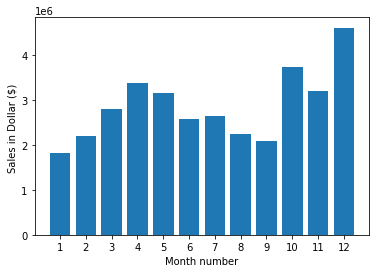

In [13]:
months = range(1,13)

plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in Dollar ($) ')
plt.xlabel('Month number')
plt.show()

####         From above observation , December was the best month for sales . 

####  What city sold the most product? 

In [14]:
Merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas[TX]
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston[MA]
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA]
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA]
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA]


In [15]:
results = Merged_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta[GA],16602,2.779908e+06,104794,2.795499e+06
Austin[TX],11153,1.809874e+06,69829,1.819582e+06
Boston[MA],22528,3.637410e+06,141112,3.661642e+06
Dallas[TX],16730,2.752628e+06,104620,2.767975e+06
Los Angeles[CA],33289,5.421435e+06,208325,5.452571e+06
New York City[NY],27932,4.635371e+06,175741,4.664317e+06
Portland[ME],2750,4.471893e+05,17144,4.497583e+05
Portland[OR],11303,1.860558e+06,70621,1.870732e+06
San Francisco[CA],50239,8.211462e+06,315520,8.262204e+06


#### Data Visualisation : Bar Plot 

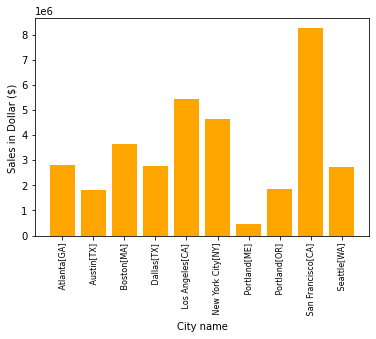

In [16]:
# doing this to make x(cities) and y(Sales) data in same order

cities = [city for city,df in Merged_data.groupby('City')] # List Comprehension


plt.bar(cities,results['Sales'], color = 'orange')
plt.xticks(cities , rotation = 'vertical' , size = 8)
plt.ylabel('Sales in Dollar ($) ')
plt.xlabel('City name')
plt.show()

#### From above observation : San Francisco sold the most products 


#### What time should we display advertisements to maximize the likelihood of purchases?

In [17]:
Merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas[TX]
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston[MA]
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA]
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA]
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA]


In [18]:
# Converting to date time object , 

Merged_data['Order Date'] = pd.to_datetime(Merged_data['Order Date'])

In [19]:
# Adding Hour and minute column using Order Date col 

Merged_data['Hour'] = Merged_data['Order Date'].dt.hour
Merged_data['Minute'] = Merged_data['Order Date'].dt.minute
Merged_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas[TX],8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston[MA],22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA],14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],9,27


#### Data Visualisation : Line Chart 

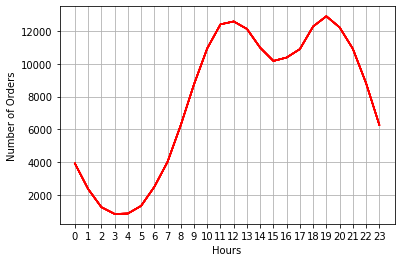

In [20]:
hours = [hour for hour,df in Merged_data.groupby('Hour')] 

plt.plot(hours, Merged_data.groupby(['Hour']).count(), color='red')

plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

####  From above chart we can say around 11 am or 7 pm 

#### What products are most often sold together?

In [21]:
Merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas[TX],8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston[MA],22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA],14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],9,27


In [22]:
# Creating a new dataframe ,filter by Order ID , duplicate will check or cells and see which one are duplicated

df1 = Merged_data[Merged_data['Order ID'].duplicated(keep = False)] # keep = False : Mark all duplicates as ``True``
df1.head(20)



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA],14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA],19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles[CA],19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston[MA],11,31
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston[MA],11,31
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco[CA],17,0
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco[CA],17,0
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City[NY],11,7
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City[NY],11,7


In [23]:
df1['Grouped Product'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df1.head()

<ipython-input-23-75819995e761>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped Product'] = df1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped Product
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA],14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA],19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles[CA],19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston[MA],11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [24]:
df1 = df1[['Order ID','Grouped Product']].drop_duplicates()  # removing duplicated from Order ID and Grouped Procuct 
df1.head()

,Order ID,Grouped Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [25]:
# count the pairs 

count = Counter()

for row in df1['Grouped Product']:
    row_list = row.split(',') # spliting sublist
    count.update(Counter(combinations(row_list,2))) # 2 products together , can be 3  also 

for key,value in count.most_common(10):
    print(key,value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### From above obervation, 'iPhone', 'Lightning Charging Cable'  are most often sold together

#### What product sold the most? Why ?

In [26]:
# We need  Sum of Quantity Ordered grouped BY Prouct 

Merged_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas[TX],8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston[MA],22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles[CA],14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles[CA],9,27


In [27]:
product_group = Merged_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']


#### Data Visualisation : Bar Plot 

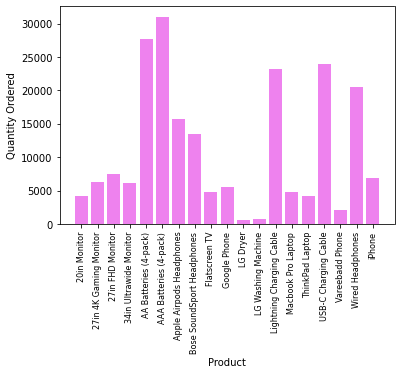

In [28]:
products = [product for product,df in product_group] # List Comprehension


plt.bar(products,quantity_ordered,color='violet')
plt.xticks(products, rotation = 'vertical' , size = 8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.show()

#### Overlaying a second Y-axis on existing chart

In [29]:
prices = Merged_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-30-49468638cf9c>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products,prices, 'b-',color='black')
<ipython-input-30-49468638cf9c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products,rotation='vertical',size=8)


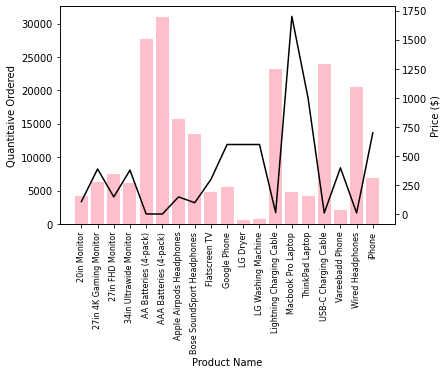

In [30]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(products,quantity_ordered,color='pink')
ax2.plot(products,prices, 'b-',color='black')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantitaive Ordered', color='black')
ax2.set_ylabel('Price ($)', color='black')
ax1.set_xticklabels(products,rotation='vertical',size=8)

plt.show()

 #### AAA bateries sold the most becuase it cheaper and and used on daily basis whereas LG dryers and Washing machine are those kind of products that are not purchased frequently as compare to batteries and its costly also . 